### Import libraries yang dibutuhkan

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Membaca data

In [2]:
data=pd.read_excel('./selenagomez_clean_new_normalize.xlsx')
del data['Unnamed: 0']
data

,created_at,username,text,preprocessed,sentiment
0,Thu Mar 02 23:59:30 +0000 2023,darkonsun,social media is a disease and this hailey bieb...,social media disease hailey bieber selena gome...,Neutral
1,Thu Mar 02 23:56:18 +0000 2023,babyyyannieee,Justin Bieber &amp; Selena Gomez followed each...,justin bieber amp selena gomez follow twitter ...,Negative
2,Thu Mar 02 23:55:57 +0000 2023,likabeast101,Selena Gomez drove by my house 🙀,selena gomez drive miss house,Negative
3,Thu Mar 02 23:55:36 +0000 2023,whoismelanyway,I understand hailey Bieber because if my husba...,understand hailey bieber miss husband ex selen...,Negative
4,Thu Mar 02 23:54:50 +0000 2023,_mayyraa,but then i always realize because SELENA GOMEZ...,always realize selena gomez always look good,Positive
...,...,...,...,...,...
5201,Wed Mar 01 10:19:04 +0000 2023,SAFFAOnAirRadio,"@SAFFAOnAirRadio is now playing, Selena Gomez,...",play selena gomez marshmello wolves stream liv...,Positive
5202,Wed Mar 01 10:19:01 +0000 2023,tshepiixx,Go follow Selena Gomez on IG 😡,go follow selena gomez instagram,Neutral
5203,Wed Mar 01 10:17:59 +0000 2023,Chief_I_H8_U,@Ricius496 @endlessbonerz Selena Gomez has a m...,selena gomez medical issue still baddie,Neutral
5204,Wed Mar 01 10:15:42 +0000 2023,vinalraswati,I still can taste it and i hate it. \n\nPeople...,still taste hate people know selena gomez,Negative


### Memilih data teks dan label

In [3]:
data=data[['preprocessed','sentiment']]
data

,preprocessed,sentiment
0,social media disease hailey bieber selena gome...,Neutral
1,justin bieber amp selena gomez follow twitter ...,Negative
2,selena gomez drive miss house,Negative
3,understand hailey bieber miss husband ex selen...,Negative
4,always realize selena gomez always look good,Positive
...,...,...
5201,play selena gomez marshmello wolves stream liv...,Positive
5202,go follow selena gomez instagram,Neutral
5203,selena gomez medical issue still baddie,Neutral
5204,still taste hate people know selena gomez,Negative


In [4]:
data['sentiment'].value_counts()

sentiment
Positive    1995
Negative    1760
Neutral     1451
Name: count, dtype: int64

### Mengubah label sentimen menjadi numeris

In [5]:
data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])
data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10564\1650668707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sentiment = pd.Categorical(pd.factorize(data.sentiment)[0])


,preprocessed,sentiment
0,social media disease hailey bieber selena gome...,0
1,justin bieber amp selena gomez follow twitter ...,1
2,selena gomez drive miss house,1
3,understand hailey bieber miss husband ex selen...,1
4,always realize selena gomez always look good,2
...,...,...
5201,play selena gomez marshmello wolves stream liv...,2
5202,go follow selena gomez instagram,0
5203,selena gomez medical issue still baddie,0
5204,still taste hate people know selena gomez,1


In [6]:
data['preprocessed']=data['preprocessed'].astype(str)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10564\2457564672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['preprocessed']=data['preprocessed'].astype(str)


In [7]:
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer=Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(data['preprocessed'])
len(tokenizer.word_index)

5402

In [8]:
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
temp=0
kamus={}
for item in sequences:
    coba=len(item)
    if coba not in kamus:
        kamus[coba]=1
    else:
        kamus[coba]+=1

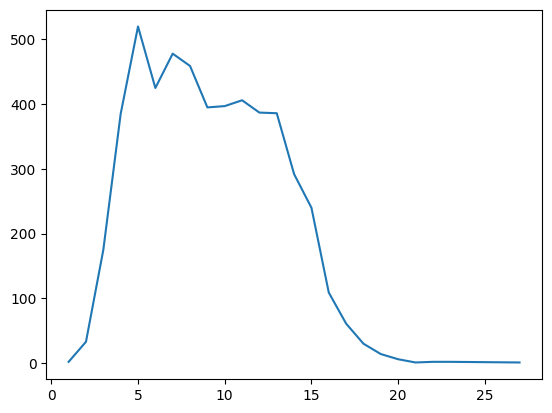

In [9]:
import matplotlib.pylab as plt

lists = sorted(kamus.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [11]:
max(kamus)

27

### Tokenizing data 

In [12]:
max_len=max(kamus)
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer=Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(data['preprocessed'])
sequences=tokenizer.texts_to_sequences(data['preprocessed'])
padded=pad_sequences(sequences=sequences,padding=padding_type,truncating=trunc_type,maxlen=max_len)
padded

array([[ 196,  226, 1648, ...,    0,    0,    0],
       [  13,    6,   19, ...,    0,    0,    0],
       [   2,    3,  769, ...,    0,    0,    0],
       ...,
       [   2,    3, 1611, ...,    0,    0,    0],
       [  76,  579,   77, ...,    0,    0,    0],
       [ 165,  280, 5401, ...,    0,    0,    0]])

In [13]:
padded[0]

array([ 196,  226, 1648,    5,    6,    2,    3,  220,  354,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

### Split data menjadi training dan testing

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,data['sentiment'],test_size=0.1,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4685, 27), (521, 27), (4685,), (521,))

In [15]:
y_test.value_counts()

sentiment
2    208
1    174
0    139
Name: count, dtype: int64

### Encode label 

In [16]:
y_train= tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test= tf.keras.utils.to_categorical(y_test, num_classes=3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4685, 27), (521, 27), (4685, 3), (521, 3))

### Definisikan fungsi metric evaluasi f1 score

In [17]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Function untuk melatih model sederhana

In [18]:
def createSimpleModel(skenario):
    if skenario ==1:
        model=tf.keras.models.Sequential([
            tf.keras.layers.Embedding(len(tokenizer.word_index),16,input_length=max_len),
            tf.keras.layers.LSTM(64,activation='tanh',return_sequences=True),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy',f1_m])
    else:
        model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index),16,input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,activation='tanh',return_sequences=True)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(3,activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy',f1_m])
    model.summary()
    return model


### Inisialisasi callback Early Stopping

In [46]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

### Function untuk melatih model kompleks

In [47]:
def createComplexModel(skenario):
    if skenario ==1:
        model=tf.keras.models.Sequential([
            tf.keras.layers.Embedding(len(tokenizer.word_index),128,input_length=max_len),
            tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2),
            tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2),
            tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy',f1_m])
    else:
        model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index),128,input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='relu',dropout=0.2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3,activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy',f1_m])
    model.summary()
    return model


### Melatih model sederhana

In [48]:
result=[]
models=[]
for i in range(1,3):
    model=createSimpleModel(i)
    history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])
    models.append(model)
    result.append(history)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 27, 16)            86432     
                                                                 
 lstm_18 (LSTM)              (None, 27, 64)            20736     
                                                                 
 flatten_10 (Flatten)        (None, 1728)              0         
                                                                 
 dense_14 (Dense)            (None, 3)                 5187      
                                                                 
Total params: 112,355
Trainable params: 112,355
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
132/132 [==============================] - 12s 69ms/step - loss: 0.9324 - accuracy: 0.5157 - f1_m: 0.3209 - val_loss: 0.7739 - val_accuracy: 0.6546 - val_f1_m: 0.5837
E

### Visualisasi hasil training model sederhana

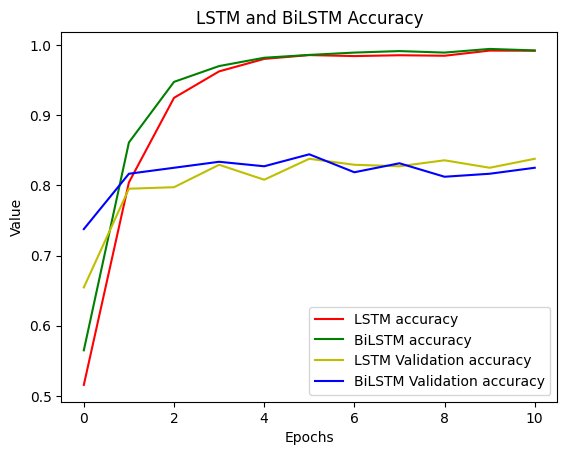

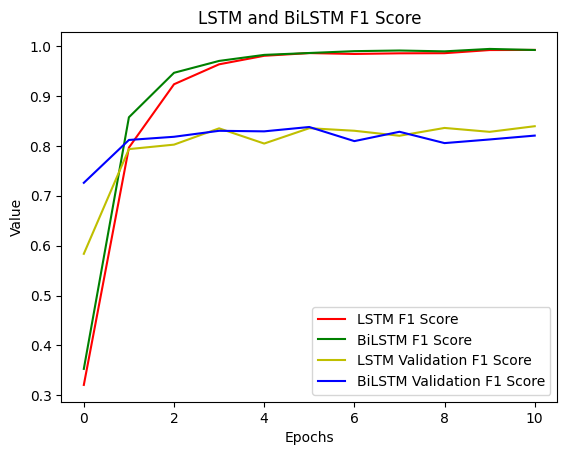

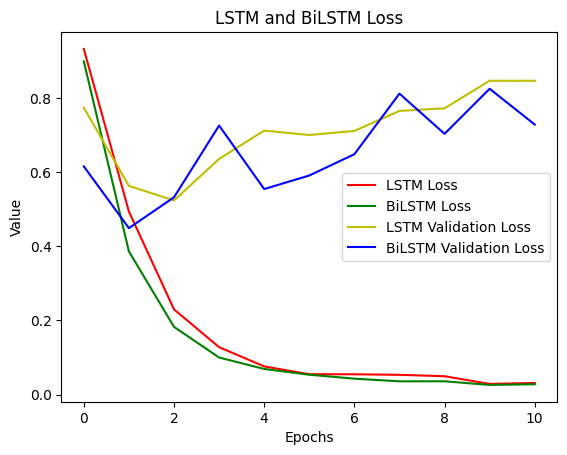

In [49]:
def compareAccuracyArchitecture(result):
    plt.plot(result[0].history['accuracy'],color='r',label='LSTM accuracy')
    plt.plot(result[1].history['accuracy'],color='g',label='BiLSTM accuracy')
    plt.plot(result[0].history['val_accuracy'],color='y',label='LSTM Validation accuracy')
    plt.plot(result[1].history['val_accuracy'],color='b',label='BiLSTM Validation accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("LSTM and BiLSTM Accuracy")
    plt.legend()
    plt.show()
compareAccuracyArchitecture(result)
def comparef1scoreArchitecture(result):
    plt.plot(result[0].history['f1_m'],color='r',label='LSTM F1 Score')
    plt.plot(result[1].history['f1_m'],color='g',label='BiLSTM F1 Score')
    plt.plot(result[0].history['val_f1_m'],color='y',label='LSTM Validation F1 Score')
    plt.plot(result[1].history['val_f1_m'],color='b',label='BiLSTM Validation F1 Score')
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("LSTM and BiLSTM F1 Score")
    plt.legend()
    plt.show()
comparef1scoreArchitecture(result)
def compareLossArchitecture(result):
    plt.plot(result[0].history['loss'],color='r',label='LSTM Loss')
    plt.plot(result[1].history['loss'],color='g',label='BiLSTM Loss')
    plt.plot(result[0].history['val_loss'],color='y',label='LSTM Validation Loss')
    plt.plot(result[1].history['val_loss'],color='b',label='BiLSTM Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("LSTM and BiLSTM Loss")
    plt.legend()
    plt.show()
compareLossArchitecture(result)

### Evaluasi model sederhana

In [50]:
for item in models:
    temp=item.evaluate(x_test,y_test)
    temp

17/17 [==============================] - 0s 8ms/step - loss: 0.9038 - accuracy: 0.8119 - f1_m: 0.8106


### Save model sederhana

In [51]:
# models[0].save('./Model/Simple/Architecture/lstm_after_sidang.h5')
# models[1].save('./Model/Simple/Architecture/bilstm_after_sidang.h5')

### Load and Testing Model

In [26]:
lstm_model=tf.keras.models.load_model('./Model/Simple/Architecture/lstm.h5',custom_objects={'f1_m':f1_m})
lstm_model.evaluate(x_test,y_test)

17/17 [==============================] - 1s 7ms/step - loss: 0.9279 - accuracy: 0.7831 - f1_m: 0.7868


[0.9279114603996277, 0.7831094264984131, 0.786816418170929]

In [27]:
bi_lstm_model=tf.keras.models.load_model('./Model/Simple/Architecture/bilstm.h5',custom_objects={'f1_m':f1_m})
bi_lstm_model.evaluate(x_test,y_test)

17/17 [==============================] - 1s 9ms/step - loss: 0.7966 - accuracy: 0.8157 - f1_m: 0.8197


[0.7966405749320984, 0.8157389760017395, 0.8197032809257507]

### Melatih model skenario kompleks

In [37]:
result_complex=[]
models_complex=[]
for i in range(1,3):
    model=createComplexModel(i)
    history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])
    models_complex.append(model)
    result_complex.append(history)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 27, 128)           691456    
                                                                 
 lstm_12 (LSTM)              (None, 27, 128)           131584    
                                                                 
 lstm_13 (LSTM)              (None, 27, 128)           131584    
                                                                 
 lstm_14 (LSTM)              (None, 27, 128)           131584    
                                                                 
 flatten_8 (Flatten)         (None, 3456)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1769984   
                                                                 
 dropout_2 (Dropout)         (None, 512)              

### Visualisasi hasil training model kompleks

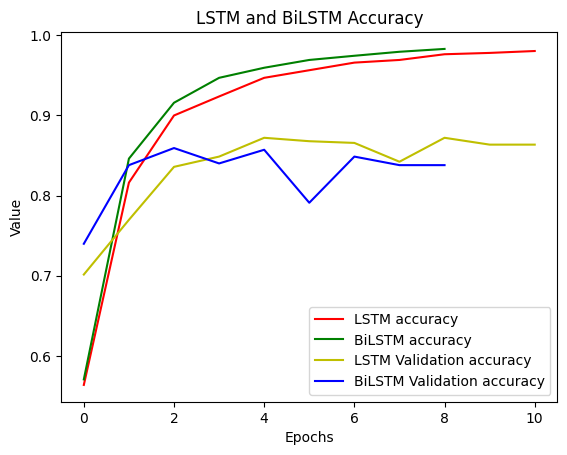

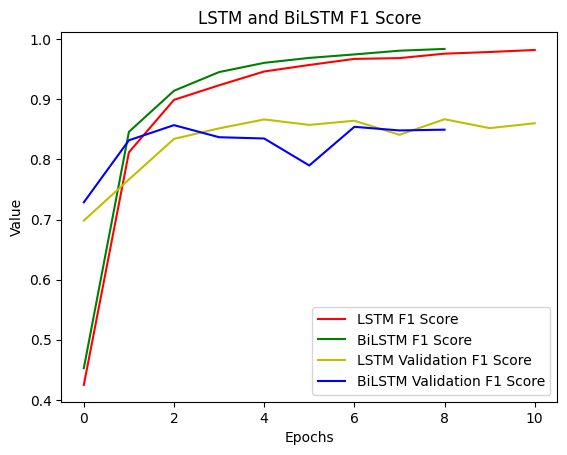

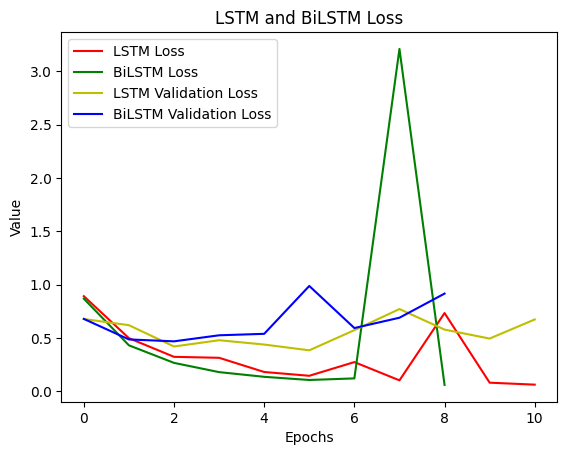

In [42]:
def compareAccuracyArchitecture(result):
    plt.plot(result[0].history['accuracy'],color='r',label='LSTM accuracy')
    plt.plot(result[1].history['accuracy'],color='g',label='BiLSTM accuracy')
    plt.plot(result[0].history['val_accuracy'],color='y',label='LSTM Validation accuracy')
    plt.plot(result[1].history['val_accuracy'],color='b',label='BiLSTM Validation accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("LSTM and BiLSTM Accuracy")
    plt.legend()
    plt.show()
compareAccuracyArchitecture(result_complex)
def comparef1scoreArchitecture(result):
    plt.plot(result[0].history['f1_m'],color='r',label='LSTM F1 Score')
    plt.plot(result[1].history['f1_m'],color='g',label='BiLSTM F1 Score')
    plt.plot(result[0].history['val_f1_m'],color='y',label='LSTM Validation F1 Score')
    plt.plot(result[1].history['val_f1_m'],color='b',label='BiLSTM Validation F1 Score')
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("LSTM and BiLSTM F1 Score")
    plt.legend()
    plt.show()
comparef1scoreArchitecture(result_complex)
def compareLossArchitecture(result):
    plt.plot(result[0].history['loss'],color='r',label='LSTM Loss')
    plt.plot(result[1].history['loss'],color='g',label='BiLSTM Loss')
    plt.plot(result[0].history['val_loss'],color='y',label='LSTM Validation Loss')
    plt.plot(result[1].history['val_loss'],color='b',label='BiLSTM Validation Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("LSTM and BiLSTM Loss")
    plt.legend()
    plt.show()
compareLossArchitecture(result_complex)

### Confussion matrix model skenario kompleks

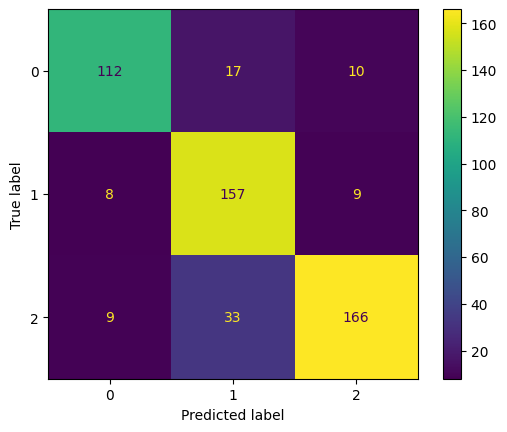

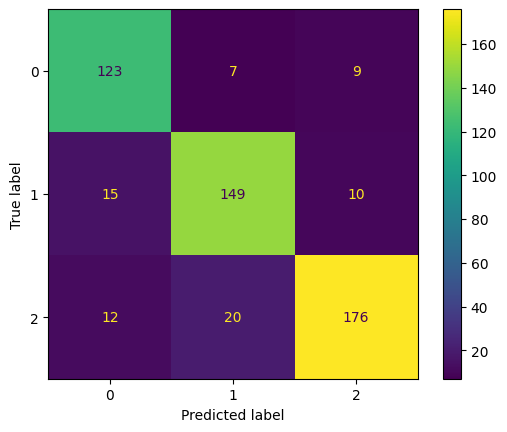

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
for item in models_complex:
    predict=item.predict(x_test)
    confusion=confusion_matrix(np.argmax(y_test,axis=1),np.argmax(predict,axis=1))
    display=ConfusionMatrixDisplay(confusion_matrix=confusion)
    display.plot()

### Evaluasi model kompleks

In [44]:
for item in models_complex:
    temp=item.evaluate(x_test,y_test)
    temp

17/17 [==============================] - 1s 59ms/step - loss: 0.4439 - accuracy: 0.8599 - f1_m: 0.8624


In [45]:
models_complex[0].save('./Model/Complex/Architecture/lstm_after_sidang.h5')
models_complex[1].save('./Model/Complex/Architecture/bilstm_after_sidang.h5')

In [28]:
lstm_model=tf.keras.models.load_model('./Model/Complex/Architecture/lstm.h5',custom_objects={'f1_m':f1_m})
lstm_model.evaluate(x_test,y_test)

17/17 [==============================] - 1s 23ms/step - loss: 0.5291 - accuracy: 0.8369 - f1_m: 0.8385


[0.5290623307228088, 0.8368521928787231, 0.8384764194488525]

In [29]:
bi_lstm_model=tf.keras.models.load_model('./Model/Complex/Architecture/bilstm.h5',custom_objects={'f1_m':f1_m})
bi_lstm_model.evaluate(x_test,y_test)

17/17 [==============================] - 1s 29ms/step - loss: 0.4158 - accuracy: 0.8637 - f1_m: 0.8598


[0.415822833776474, 0.863723635673523, 0.8597713708877563]

In [36]:
np.save('./Sidang/x_test.npy',x_test)
np.save('./Sidang/y_test.npy',y_test)

In [177]:
def createComplexModel(skenario):
    if skenario ==1:
        model=tf.keras.models.Sequential([
            tf.keras.layers.Embedding(len(tokenizer.word_index),128,input_length=max_len),
            tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2),
            tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2),
            tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy',f1_m])
    else:
        model=tf.keras.models.Sequential([
        tf.keras.layers.Embedding(len(tokenizer.word_index),128,input_length=max_len),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True,activation='tanh',dropout=0.2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3,activation='softmax')
        ])
        model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy',f1_m])
    model.summary()
    return model


In [178]:
model=createSimpleModel(skenario=1)
history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 15, 16)            111920    
                                                                 
 lstm_12 (LSTM)              (None, 64)                20736     
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 132,851
Trainable params: 132,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
132/132 [==============================] - 3s 11ms/step - loss: 0.9443 - accuracy: 0.5140 - f1_m: 0.2948 - val_loss: 0.7974 - val_accuracy: 0.6375 - val_f1_m: 0.6092
Epoch 2/20
132/132 [==============================] - 1s 8ms/step - loss: 0.5657 - accuracy: 0.7438 - f1_m: 0.7369 - val_loss: 0.7131 -

In [179]:
model.layers

### Input test data

In [180]:
x_test,x_test.shape

(array([[ 173,   16, 6405, ...,    0,    0,    0],
        [5250,  369,    2, ...,  128,    0,    0],
        [2404, 1678, 2405, ..., 2405,    4,    5],
        ...,
        [1763,  365,   74, ...,    0,    0,    0],
        [4844, 4845, 4846, ...,    0,    0,    0],
        [ 117,  140,    2, ...,    0,    0,    0]]),
 (521, 15))

### Embedding layer

In [182]:
from tensorflow import keras
import numpy as np
embedding_input=model.layers[0].input
embedding_output=model.layers[0].output
embedding=keras.Model(inputs=embedding_input,outputs=embedding_output)
output_embedding=embedding.predict(np.expand_dims(x_test[0],axis=0))
output_embedding,output_embedding.shape

(array([[[-0.08564696, -0.01744049,  0.1172644 ,  0.12727132,
          -0.01384822, -0.09773464,  0.14303532,  0.02509661,
           0.06805536, -0.12647988, -0.00644191, -0.12054568,
          -0.13721839,  0.03718762, -0.10092895, -0.04226707],
         [-0.01906524,  0.001363  ,  0.01712277, -0.05112733,
          -0.03723992, -0.0108652 , -0.01587733, -0.0166717 ,
           0.01384304, -0.02254228, -0.03825673,  0.07405116,
           0.02555125, -0.05676028,  0.06948423,  0.04732694],
         [ 0.01422781, -0.04537791, -0.0150496 ,  0.03225912,
          -0.00381384,  0.02500587,  0.03923127, -0.00954064,
           0.03555639,  0.03373199, -0.04378393,  0.04088188,
          -0.01602812, -0.01531584, -0.03982463,  0.04818117],
         [-0.00580217, -0.0201135 , -0.01666092, -0.03838816,
           0.01658286,  0.05133421, -0.00276106, -0.01935991,
          -0.04370663, -0.03281876,  0.01902615,  0.01438101,
          -0.04125885, -0.04126599,  0.04331795,  0.00544324],
    

### LSTM Layer

In [183]:
lstm_input=model.layers[1].input
lstm_output=model.layers[1].output
lstm=keras.Model(inputs=lstm_input,outputs=lstm_output)
output_lstm=lstm.predict(output_embedding)
output_lstm,output_lstm.shape

(array([[ 0.6065825 ,  0.07432146,  0.02300354, -0.52221584, -0.46148956,
         -0.41951177, -0.05062771,  0.63255435,  0.424027  , -0.47803652,
         -0.04570314,  0.03052162, -0.4882037 ,  0.34545335, -0.42776427,
          0.08055538,  0.0033612 ,  0.31964132, -0.7654764 ,  0.4108446 ,
          0.23798093, -0.5075801 ,  0.01382415, -0.11718388, -0.10080931,
          0.50461334,  0.07643717,  0.41815025, -0.4956271 , -0.6382972 ,
          0.08000343,  0.0568576 ,  0.03240082,  0.3500124 ,  0.00233129,
         -0.12512758,  0.39160246, -0.00352364,  0.4263153 , -0.49354485,
         -0.23003075, -0.2461164 ,  0.53223336,  0.11060859,  0.47915676,
          0.00306759, -0.24988228, -0.32790026,  0.02685227, -0.0659815 ,
         -0.36370838,  0.05806285,  0.03193521, -0.6516039 ,  0.09097835,
          0.48730865, -0.24649319,  0.088048  ,  0.12428961, -0.15627727,
          0.0842758 ,  0.51604736,  0.08575077, -0.5109891 ]],
       dtype=float32),
 (1, 64))

### Dense layer (Output Layer)

In [184]:
dense_input=model.layers[2].input
dense_output=model.layers[2].output
dense=keras.Model(inputs=dense_input,outputs=dense_output)
output_dense=dense.predict(output_lstm)
output_dense,output_dense.shape

(array([[0.00325259, 0.9955721 , 0.00117532]], dtype=float32), (1, 3))

In [185]:
model=createComplexModel(2)
history=model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[callback])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 15, 128)           895360    
                                                                 
 bidirectional_7 (Bidirectio  (None, 15, 256)          263168    
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 15, 256)          394240    
 nal)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 15, 256)          394240    
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 3840)              0         
                                                      

In [186]:
temp=model.evaluate(x_test,y_test)
temp

17/17 [==============================] - 0s 12ms/step - loss: 0.5524 - accuracy: 0.8791 - f1_m: 0.8862


[0.5524386763572693, 0.8790786862373352, 0.8861987590789795]

In [187]:
from tensorflow import keras
import numpy as np
intermediate_model = keras.Model(inputs=model.input, outputs=model.layers[1].output) 
intermediate_model

### List Semua Layer yang ada di deep learning

In [188]:
model.layers

### Embedding layer

In [189]:
embedding_input=model.layers[0].input
embedding_output=model.layers[0].output
embedding=keras.Model(inputs=embedding_input,outputs=embedding_output)
output_embedding=embedding.predict(x_test)
output_embedding

array([[[-0.10029772,  0.08240913,  0.04698651, ..., -0.06365843,
          0.00448414,  0.05073181],
        [ 0.03037432, -0.02477089,  0.01509915, ..., -0.00816446,
         -0.05283854,  0.03083451],
        [ 0.01518885, -0.01734103, -0.02457405, ...,  0.01154898,
          0.03334842,  0.02895344],
        ...,
        [-0.03315816, -0.00910833, -0.01032697, ...,  0.00631205,
         -0.01741631, -0.03524626],
        [-0.03315816, -0.00910833, -0.01032697, ...,  0.00631205,
         -0.01741631, -0.03524626],
        [-0.03315816, -0.00910833, -0.01032697, ...,  0.00631205,
         -0.01741631, -0.03524626]],

       [[-0.0280486 , -0.022088  , -0.03516274, ...,  0.02839096,
         -0.00148554, -0.04477645],
        [ 0.01745749, -0.02135714, -0.07549311, ..., -0.01454849,
          0.03161804, -0.04970148],
        [ 0.04437547, -0.03951878,  0.00265059, ..., -0.02408721,
         -0.02213774,  0.0385293 ],
        ...,
        [-0.01371258,  0.05896948, -0.01127262, ...,  

### BILSTM #1

In [190]:
lstm_input=model.layers[1].input
lstm_output=model.layers[1].output
lstm=keras.Model(inputs=lstm_input,outputs=lstm_output)
output_lstm=lstm.predict(output_embedding)
output_lstm

array([[[-2.91805416e-02,  7.01623363e-03, -5.07524796e-02, ...,
          1.29828341e-02, -1.50924688e-03, -7.78731541e-04],
        [-2.03534309e-02,  2.16276087e-02, -3.74379978e-02, ...,
         -1.51067749e-02, -1.66436320e-03, -6.22126320e-03],
        [-2.08701715e-02,  2.40315031e-02, -2.66275778e-02, ...,
          3.83477146e-03,  4.48278664e-03, -8.42124410e-03],
        ...,
        [ 5.96259022e-03,  4.30622604e-03,  1.49633614e-02, ...,
         -7.68624991e-03,  4.13706526e-04, -5.19284979e-03],
        [ 6.63484819e-03,  2.60239071e-03,  1.51868658e-02, ...,
         -5.64206857e-03,  3.06402391e-04, -3.75021761e-03],
        [ 7.45580764e-03,  1.05877116e-03,  1.54832415e-02, ...,
         -3.11869010e-03,  1.80459669e-04, -2.00234610e-03]],

       [[ 1.82253891e-03,  2.48059165e-03,  3.34804319e-03, ...,
         -9.53252707e-03, -1.30109154e-02,  6.89233746e-03],
        [-5.88515133e-04,  5.77991363e-03,  8.21620226e-03, ...,
         -1.26094893e-02, -1.60524510e

### BILSTM #2

In [191]:
lstm_input2=model.layers[2].input
lstm_output2=model.layers[2].output
lstm=keras.Model(inputs=lstm_input2,outputs=lstm_output2)
output_lstm2=lstm.predict(output_lstm)
output_lstm2

array([[[-0.02780793, -0.01645498, -0.00734741, ..., -0.03116002,
          0.00103737,  0.01606689],
        [-0.03646852, -0.01549974, -0.00535821, ..., -0.01900684,
         -0.00275586,  0.01423931],
        [-0.04268724, -0.01274047, -0.00734195, ..., -0.01189499,
         -0.00264086,  0.01420826],
        ...,
        [ 0.02363249,  0.01865226,  0.00331911, ...,  0.00761982,
         -0.00194693,  0.00254154],
        [ 0.02976502,  0.01705731,  0.00139125, ...,  0.00648835,
         -0.00164696,  0.00125212],
        [ 0.03520648,  0.01522291, -0.0008463 , ...,  0.00415986,
         -0.00116855,  0.00027721]],

       [[-0.00028956,  0.00097999,  0.00059324, ..., -0.00657956,
          0.00277249, -0.00976616],
        [ 0.00334238,  0.00177269,  0.0063644 , ..., -0.00821231,
         -0.00029467, -0.01328383],
        [ 0.006639  ,  0.0026361 ,  0.00827275, ..., -0.00738887,
         -0.00095905, -0.01685791],
        ...,
        [-0.04970801, -0.0234348 , -0.00320188, ..., -

### BILSTM #3

In [192]:
lstm_input3=model.layers[3].input
lstm_output3=model.layers[3].output
lstm=keras.Model(inputs=lstm_input3,outputs=lstm_output3)
output_lstm3=lstm.predict(output_lstm2)
output_lstm3

array([[[-0.00525806, -0.00723923, -0.01255045, ...,  0.10293604,
         -0.00220604, -0.01175069],
        [-0.01080132, -0.00762487, -0.01647944, ...,  0.08568821,
         -0.00646206, -0.01158566],
        [-0.01577377, -0.00663682, -0.01749464, ...,  0.06848708,
         -0.0089945 , -0.01132007],
        ...,
        [ 0.0098234 ,  0.0243351 ,  0.01546351, ..., -0.03571593,
         -0.01616449,  0.00350716],
        [ 0.01461427,  0.0245992 ,  0.01429113, ..., -0.02864838,
         -0.01314671,  0.00265788],
        [ 0.01842243,  0.02357775,  0.01195621, ..., -0.01694328,
         -0.008004  ,  0.00149056]],

       [[ 0.00130053,  0.00249171,  0.00045426, ...,  0.08827001,
          0.00911607, -0.0072435 ],
        [ 0.00315671,  0.006607  ,  0.00163562, ...,  0.10035191,
          0.00560203, -0.00930098],
        [ 0.00504236,  0.00957297,  0.00190922, ...,  0.11254647,
          0.00254626, -0.0112133 ],
        ...,
        [-0.02782251, -0.01695123, -0.03304524, ...,  

### Flatten

In [193]:
flatten_input=model.layers[4].input
flatten_output=model.layers[4].output
flatten=keras.Model(inputs=flatten_input,outputs=flatten_output)
output_flatten=flatten.predict(output_lstm3)
output_flatten

array([[-0.00525806, -0.00723923, -0.01255045, ..., -0.01694328,
        -0.008004  ,  0.00149056],
       [ 0.00130053,  0.00249171,  0.00045426, ...,  0.04989411,
        -0.01027416, -0.01034352],
       [ 0.00092425, -0.00190308, -0.0013455 , ..., -0.01296151,
         0.0144904 ,  0.0022258 ],
       ...,
       [ 0.00209681, -0.01189256, -0.00768953, ..., -0.02394521,
         0.03597266,  0.0045461 ],
       [ 0.00105986, -0.00083326, -0.00093318, ..., -0.00051793,
        -0.0018611 , -0.00047535],
       [ 0.00254805,  0.00644959,  0.0061783 , ..., -0.02456953,
        -0.01091668,  0.00366513]], dtype=float32)

### Dense #1

In [194]:
dense_input=model.layers[5].input
dense_output=model.layers[5].output
dense=keras.Model(inputs=dense_input,outputs=dense_output)
output_dense=dense.predict(output_flatten)
output_dense

array([[0.        , 0.21970543, 0.32891756, ..., 0.        , 0.3968811 ,
        0.06640249],
       [0.        , 1.0891544 , 0.        , ..., 0.        , 1.7729037 ,
        0.        ],
       [0.16622178, 0.        , 0.        , ..., 0.4366429 , 0.        ,
        0.        ],
       ...,
       [0.4185146 , 0.        , 0.        , ..., 0.69497967, 0.        ,
        0.        ],
       [0.        , 0.11176557, 0.        , ..., 0.        , 0.17159869,
        0.        ],
       [0.21807827, 0.        , 0.9429705 , ..., 0.6589502 , 0.        ,
        1.6723186 ]], dtype=float32)

### Dropout Layer

In [195]:
dropout_input=model.layers[6].input
dropout_output=model.layers[6].output
dropout=keras.Model(inputs=dropout_input,outputs=dropout_output)
output_dropout=dropout.predict(output_dense)
output_dropout

array([[0.        , 0.21970543, 0.32891756, ..., 0.        , 0.3968811 ,
        0.06640249],
       [0.        , 1.0891544 , 0.        , ..., 0.        , 1.7729037 ,
        0.        ],
       [0.16622178, 0.        , 0.        , ..., 0.4366429 , 0.        ,
        0.        ],
       ...,
       [0.4185146 , 0.        , 0.        , ..., 0.69497967, 0.        ,
        0.        ],
       [0.        , 0.11176557, 0.        , ..., 0.        , 0.17159869,
        0.        ],
       [0.21807827, 0.        , 0.9429705 , ..., 0.6589502 , 0.        ,
        1.6723186 ]], dtype=float32)

### Dense 2

In [196]:
dense_input2=model.layers[7].input
dense_output2=model.layers[7].output
dense2=keras.Model(inputs=dense_input2,outputs=dense_output2)
output_dense2=dropout.predict(output_dense)
output_dense2

array([[0.        , 0.21970543, 0.32891756, ..., 0.        , 0.3968811 ,
        0.06640249],
       [0.        , 1.0891544 , 0.        , ..., 0.        , 1.7729037 ,
        0.        ],
       [0.16622178, 0.        , 0.        , ..., 0.4366429 , 0.        ,
        0.        ],
       ...,
       [0.4185146 , 0.        , 0.        , ..., 0.69497967, 0.        ,
        0.        ],
       [0.        , 0.11176557, 0.        , ..., 0.        , 0.17159869,
        0.        ],
       [0.21807827, 0.        , 0.9429705 , ..., 0.6589502 , 0.        ,
        1.6723186 ]], dtype=float32)